In [155]:
import sklearn 
import numpy as np  
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [156]:
np.random.seed(0)

In [157]:
iris =  pd.read_csv('/kaggle/input/iris/Iris.csv')
iris.drop(iris[iris['Species'] == "Iris-setosa"].index, inplace=True)


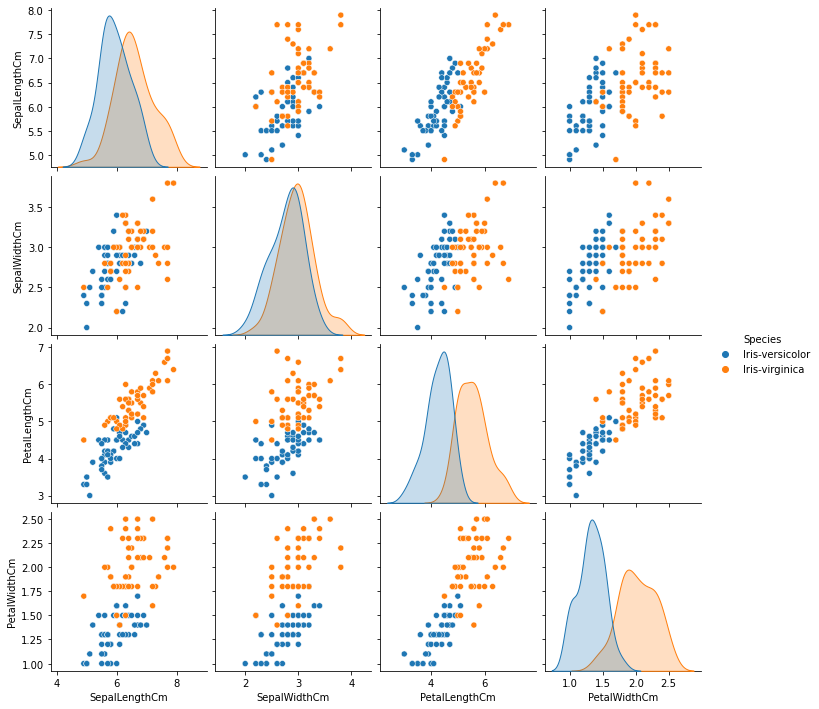

In [158]:
sb.pairplot(data=iris, vars=('SepalLengthCm','SepalWidthCm', 'PetalLengthCm','PetalWidthCm'), hue='Species')

In [159]:
sp_names = ['Iris-versicolor', 'Iris-virginica']
cols = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
re = iris[['Species']].replace(sp_names, [0, 1])
iris = pd.concat([cols, re], axis = 1)


In [160]:
X = iris.iloc[:, 0:4].values
y = iris.iloc[:,   -1].values

In [161]:
a = np.array([(1,0,)]*50)
b = np.array([(0,1,)]*50)
Y = np.concatenate((a,b), axis = 0)

In [162]:
inputneurons = 4 #iris has 4 input variables
hiddenneurons = 100 #hyperparameter, this can be altered 
outputneurons = 2 # we have 3 classes to output towards

In [163]:
firstweights = np.random.randn(inputneurons,hiddenneurons) / 10 #random 4x10 array of weights for our network 
secondweights = np.random.randn(hiddenneurons,outputneurons) / 10
alpha = 0.01 #learning rate
iters = 10000 #iterations

In [164]:
def sigmoid(x):
	return 1/(1+np.exp(-x))



In [165]:
def sigmoidprime(x):
	return x * (1-x)

#forwardpass will input data into our input layer and then produce an output activity for the activity layer
def forwardpass(X):
	hiddenrawactivity = np.dot(X,firstweights)
	hiddenactivity = sigmoid(hiddenrawactivity)
	outputrawactivity = np.dot(hiddenactivity,secondweights)
	outputactivity = sigmoid(outputrawactivity)
	return outputactivity



In [166]:
#given our forward pass, we want to change the weights based on the gradient descent method
def backpropogation(X,Y,secondweights,firstweights):
	outputerror = Y - forwardpass(X)
	outputdelta = outputerror * sigmoidprime(forwardpass(X))
    
	hiddenerror = np.dot(outputdelta , secondweights.T)
	hiddendelta = hiddenerror * sigmoidprime(sigmoid(np.dot(X,firstweights)))

	firstweights += alpha * np.dot(X.T,hiddendelta)
	secondweights += alpha * np.dot(sigmoid(np.dot(X,firstweights).T),outputdelta)



In [167]:
def train(X,Y):
	output = forwardpass(X)
	backpropogation(X,Y,secondweights,firstweights)

for i in range(1,iters):
	train(X,Y)


In [168]:

def predict(X):
	predictedclass = []
	for i in range(0,len(forwardpass(X))):
			maxpos = np.where(forwardpass(X)[i] == np.amax(forwardpass(X)[i]))
			predictedclass.append(maxpos)
	return np.array(predictedclass, dtype = int).T



In [169]:
#print labels for the predicted classes and the original labels
#print(predict(X))
#print(X)

a = np.reshape(predict(X),(1,100))



In [170]:
A = np.zeros(len(X))
def accuracy(X):
	count = 0
	for i in range(0,len(X)):
       
		if int(a[0][i]) == int(y[i]):
			count +=1            
	return count /100

for i in range(0,len(X)):
        A[i] = a[0][i]

In [171]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y,A)

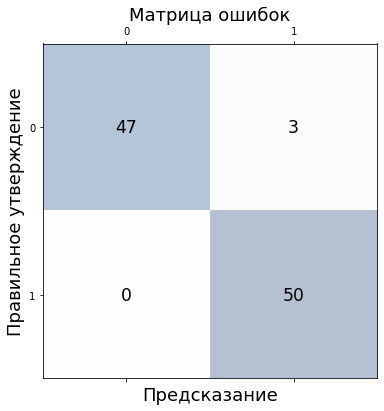

In [172]:
fig, ax = plt.subplots(figsize=(6, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', 
                ha='center', size='xx-large')
 
plt.xlabel('Предсказание', fontsize=18)
plt.ylabel('Правильное утверждение', fontsize=18)
plt.title('Матрица ошибок', fontsize=18)
plt.show()

In [173]:
sensitivity = conf_matrix[0,0]/(conf_matrix[0,0] + conf_matrix[0,1])
print('Чуствительность = ', sensitivity)
specificity = conf_matrix[1,1]/(conf_matrix[1,0] + conf_matrix[1,1])
print('Спицефичность  = ', specificity)

Чуствительность =  0.94
Спицефичность  =  1.0


In [174]:
#final accuracy of the model 
print(accuracy(X))

0.97
